# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

### Data Import & Cleaning

In [2]:
# Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
# Loading the data into a pandas dataframe
df = pd.read_csv('Wholesale_Data.csv')

df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

In [4]:
df.shape

(440, 8)

In [5]:
# Ensuring our dataset is clean (no null, missing, or incorrect values).

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


**From the information returned above, everything looks good so far.**

In [6]:
# Checking if any of the columns contain zeros (missing values)

ch_count = (df['Channel'] == 0).sum()
re_count = (df['Region'] == 0).sum()
fresh_count = (df['Fresh'] == 0).sum()
mi_count = (df['Milk'] == 0).sum()
gr_count = (df['Grocery'] == 0).sum()
fr_count = (df['Frozen'] == 0).sum()
dp_count = (df['Detergents_Paper'] == 0).sum()
d_count = (df['Delicassen'] == 0).sum()

#Print number of zeros per column
print('Channel:', ch_count, 'Region:', re_count, 'Fresh:', fresh_count, 'Milk:', mi_count, 
      'Grocery:', gr_count, 'Frozen:', fr_count, "Detergent's Paper:", dp_count, "Delicassen:", d_count 
     
     )


Channel: 0 Region: 0 Fresh: 0 Milk: 0 Grocery: 0 Frozen: 0 Detergent's Paper: 0 Delicassen: 0


**No missing values in any of the columns, perfect!**

In [7]:
# generating summary statistics per column

df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

**We can see that the values in some columns are pretty low while other columns have a much larger range of values. This might be troublesome. Looks like we will need to do some scaling to balance out the data.**

### Data Visualizations

C:\Users\got1p\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


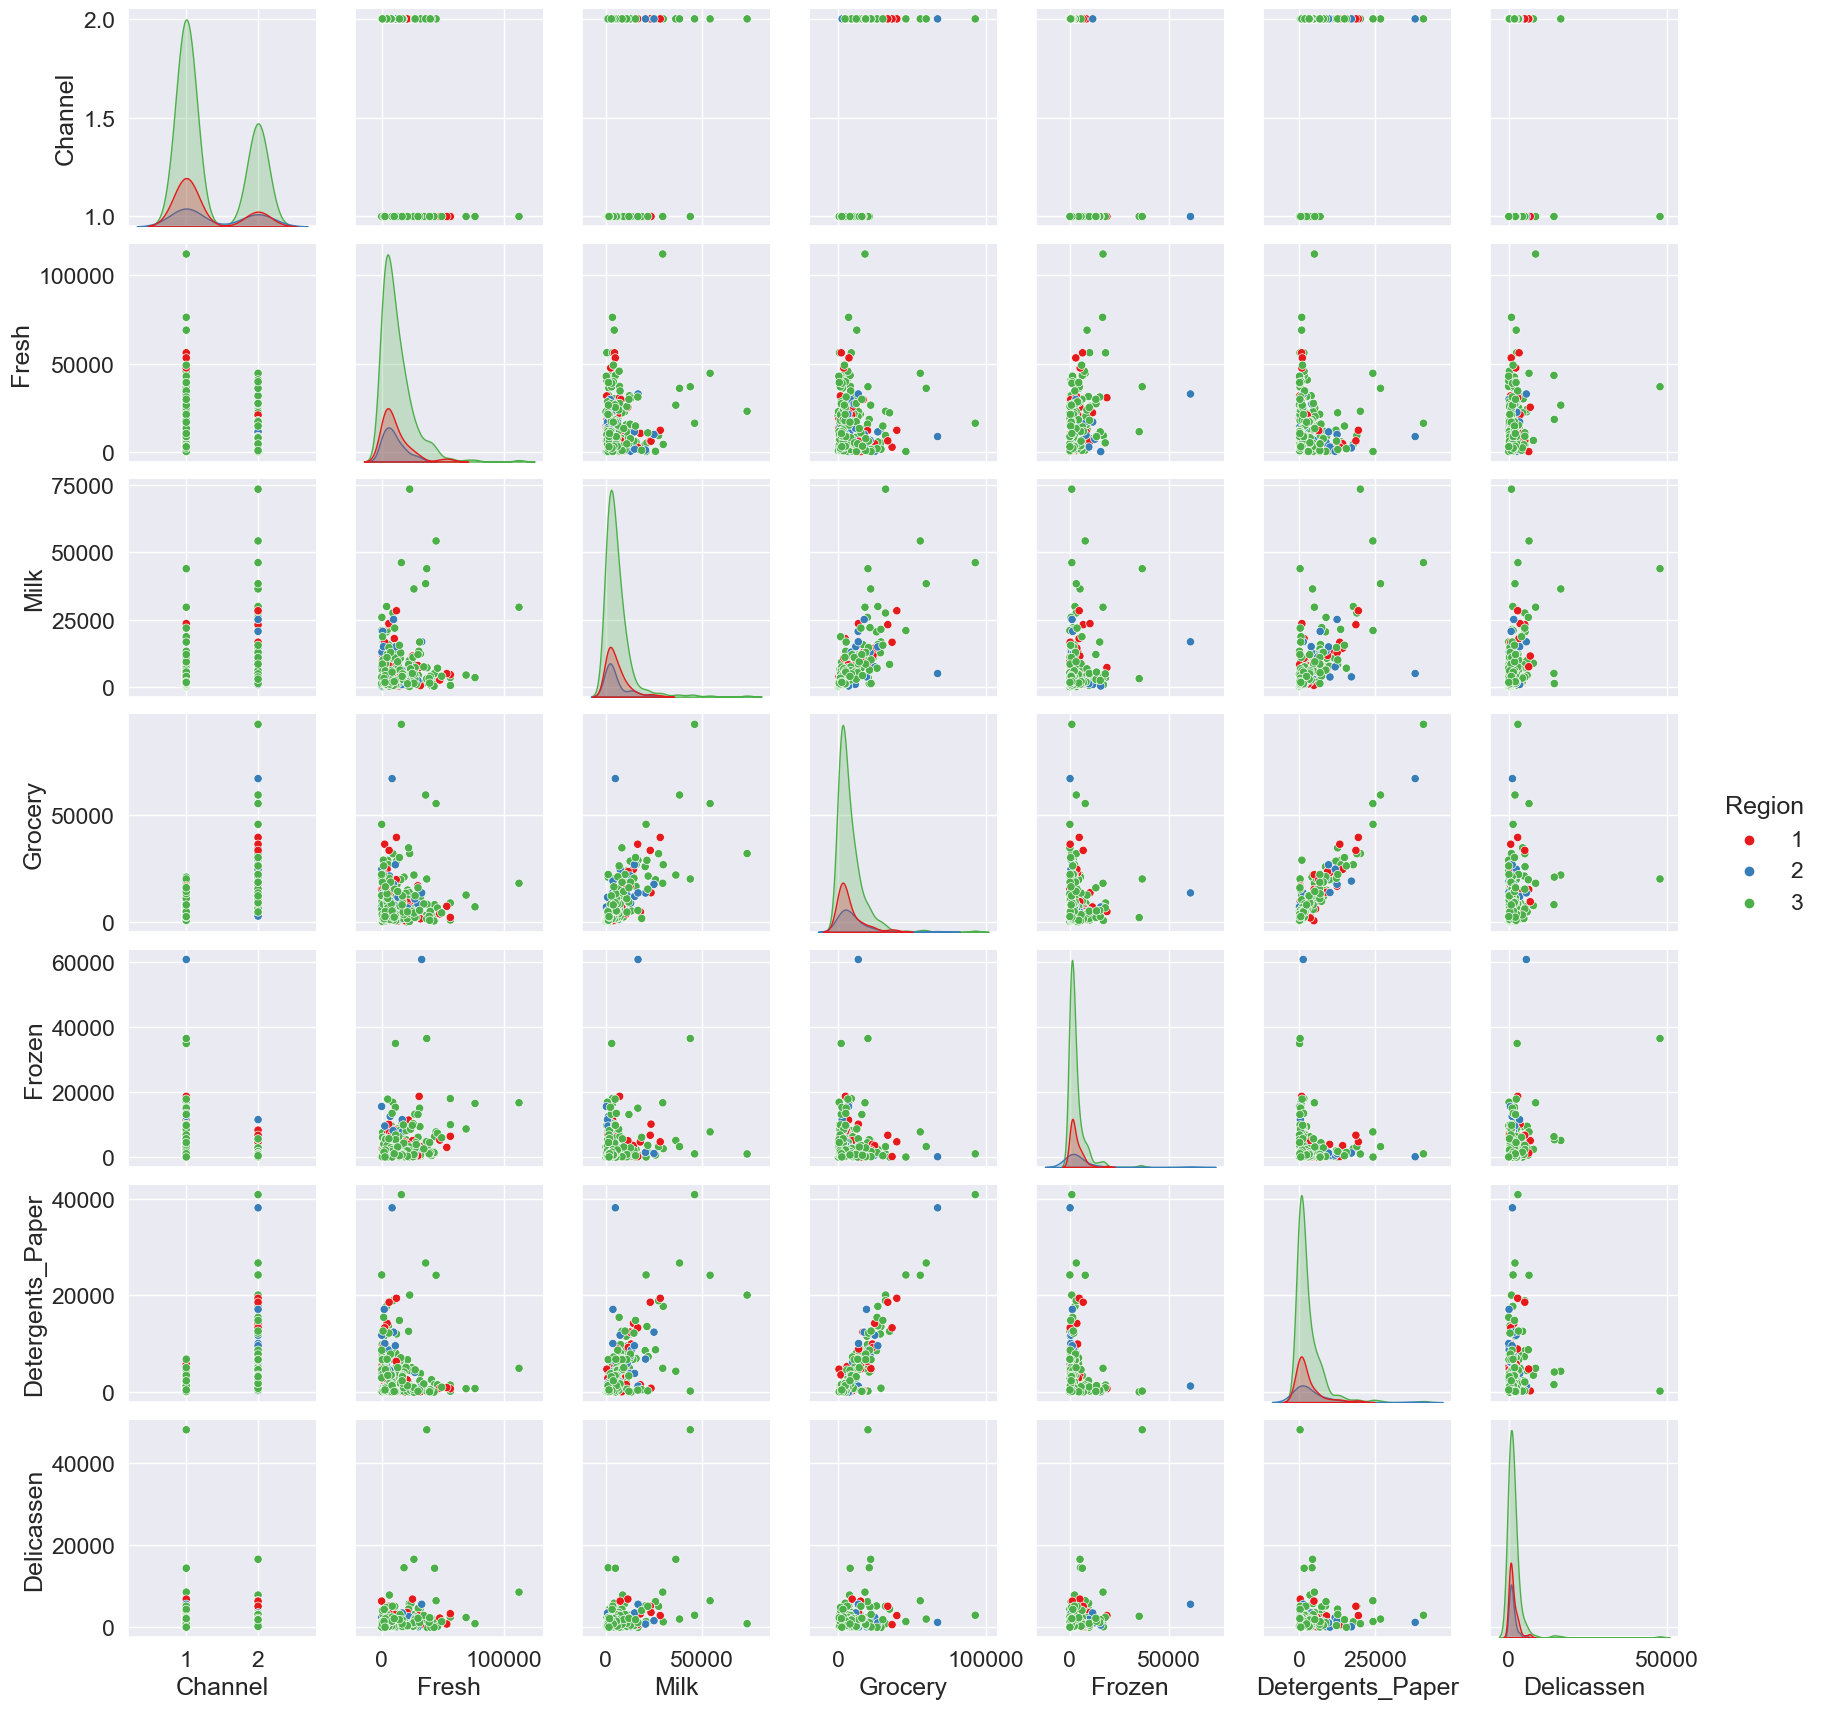

In [8]:
# Create a pairplot to view distributions, correlations, etc.

sns.set(font_scale=1.5)
sns.pairplot(df, hue = 'Region', palette = 'Set1') # Color by region
plt.show()     

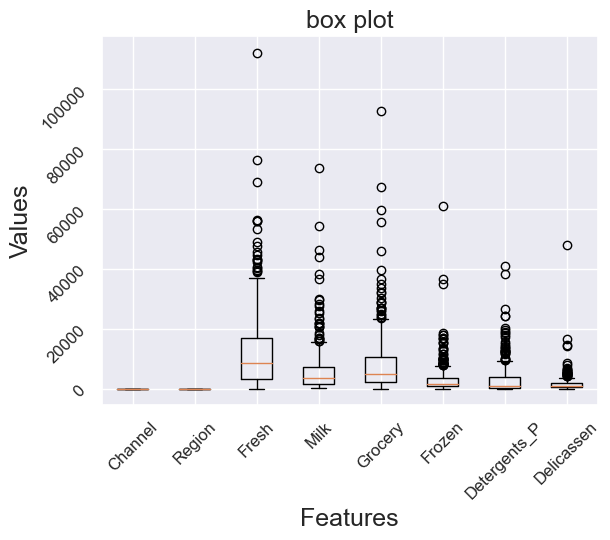

In [9]:
# Creating Boxplots for the features in the dataset

fig, ax = plt.subplots()

ax.boxplot(df)

ax.set_title('box plot')
ax.set_xlabel('Features')
ax.set_ylabel('Values')
xticklabels=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_P', 'Delicassen']
ax.set_xticklabels(xticklabels)
ax.tick_params(labelrotation=45, labelsize=12)
# add horizontal grid lines
ax.yaxis.grid(True)


# show the plot
plt.show()

In [10]:
# Taking a closer look at 'Fresh' variable
fig = px.box(df, y='Fresh')

fig.show()

### Outlier Removal

**I wont be removing all the Outliers because that would result in a loss of a lot of data and some of the outliers could very much be not erronious.**

In [11]:
df.drop(df.loc[df['Fresh']==112151].index, inplace=True) # Dropping the outlier for 'Fresh' with a value of '112151'
df.drop(df.loc[df['Milk']==73498].index, inplace=True) # Dropping the outlier for 'Milk' with a value of '73498'
df.drop(df.loc[df['Grocery']==92780].index, inplace=True) # Dropping the outlier for 'Grocery' with a value of '92780'
df.drop(df.loc[df['Frozen']==60869].index, inplace=True) # Dropping the outlier for 'Frozen' with a value of '60869'
df.drop(df.loc[df['Delicassen']==47943].index, inplace=True) # Dropping the outlier for 'Delicassen' with a value of '47943'

In [12]:
# Ensuring the outliers were removed
df.shape

(435, 8)

### Correlation Analysis

In [13]:
df.corr() #Looking at variable correlations

Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.059391 -0.170321  0.535268  0.649499 -0.224901   
Region            0.059391  1.000000  0.046938  0.004336 -0.011303 -0.019098   
Fresh            -0.170321  0.046938  1.000000 -0.013791 -0.063354  0.323822   
Milk              0.535268  0.004336 -0.013791  1.000000  0.748375 -0.011259   
Grocery           0.649499 -0.011303 -0.063354  0.748375  1.000000 -0.112060   
Frozen           -0.224901 -0.019098  0.323822 -0.011259 -0.112060  1.000000   
Detergents_Paper  0.662047 -0.019316 -0.143993  0.671349  0.916588 -0.158500   
Delicassen        0.145779  0.035856  0.216844  0.382676  0.258842  0.169273   

                  Detergents_Paper  Delicassen  
Channel                   0.662047    0.145779  
Region                   -0.019316    0.035856  
Fresh                    -0.143993    0.216844  
Milk                      0.671349    0.382676  
Grocery                   0.916588    0.258842  
Frozen                   -0.158500    0.169273  
Detergents_Paper          1.000000    0.147055  
Delicassen                0.147055    1.000000

**Some features have really strong correlations such as 'Detergents_Paper' and 'Grocery' and 'Milk' and 'Grocery'.**

### Data Transformation & Feature Selection

In [14]:
# Scaling
from sklearn.preprocessing import StandardScaler
# 
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df))

In [26]:
df_train_scaled

0         1         2         3         4         5         6  \
0    1.451600  0.592375  0.089190  0.716871 -0.008826 -0.727592 -0.019727   
1    1.451600  0.592375 -0.392901  0.742689  0.226884 -0.298717  0.122636   
2    1.451600  0.592375 -0.453377  0.574703  0.005620 -0.120574  0.173923   
3   -0.688895  0.592375  0.140388 -0.701448 -0.401087  0.987352 -0.518110   
4    1.451600  0.592375  0.943586  0.005029 -0.051458  0.297773 -0.226026   
..        ...       ...       ...       ...       ...       ...       ...   
430 -0.688895  0.592375  1.552470  1.118392  0.985452  2.852179 -0.592856   
431 -0.688895  0.592375  2.370701 -0.662050 -0.807090  0.462618 -0.613325   
432  1.451600  0.592375  0.249142  1.694605  2.655031 -0.665809  2.778533   
433 -0.688895  0.592375 -0.115175 -0.569842 -0.634683 -0.499302 -0.596076   
434 -0.688895  0.592375 -0.759709 -0.617287 -0.602033 -0.768872 -0.525009   

            7  
0   -0.031012  
1    0.226295  
2    3.791003  
3    0.233345  
4    2.228947  
..        ...  
430  0.477728  
431  0.561147  
432  0.279754  
433  0.431319  
434 -0.786486  

[435 rows x 8 columns]

In [28]:
print(df_train_scaled.columns)

RangeIndex(start=0, stop=8, step=1)


In [31]:
# Naming the columns

num_feats = df.dtypes[df.dtypes == 'int64'].index.tolist()
df_train_scaled.columns = num_feats
print(df_train_scaled.columns)

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


In [32]:
df_train_scaled

Channel    Region     Fresh      Milk   Grocery    Frozen  \
0    1.451600  0.592375  0.089190  0.716871 -0.008826 -0.727592   
1    1.451600  0.592375 -0.392901  0.742689  0.226884 -0.298717   
2    1.451600  0.592375 -0.453377  0.574703  0.005620 -0.120574   
3   -0.688895  0.592375  0.140388 -0.701448 -0.401087  0.987352   
4    1.451600  0.592375  0.943586  0.005029 -0.051458  0.297773   
..        ...       ...       ...       ...       ...       ...   
430 -0.688895  0.592375  1.552470  1.118392  0.985452  2.852179   
431 -0.688895  0.592375  2.370701 -0.662050 -0.807090  0.462618   
432  1.451600  0.592375  0.249142  1.694605  2.655031 -0.665809   
433 -0.688895  0.592375 -0.115175 -0.569842 -0.634683 -0.499302   
434 -0.688895  0.592375 -0.759709 -0.617287 -0.602033 -0.768872   

     Detergents_Paper  Delicassen  
0           -0.019727   -0.031012  
1            0.122636    0.226295  
2            0.173923    3.791003  
3           -0.518110    0.233345  
4           -0.226026    2.228947  
..                ...         ...  
430         -0.592856    0.477728  
431         -0.613325    0.561147  
432          2.778533    0.279754  
433         -0.596076    0.431319  
434         -0.525009   -0.786486  

[435 rows x 8 columns]

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [33]:
# Getting the features for clustering
x = df_train_scaled.iloc[:, 2:4].values

In [34]:
# Create function for elbow method
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",n_init=10, random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

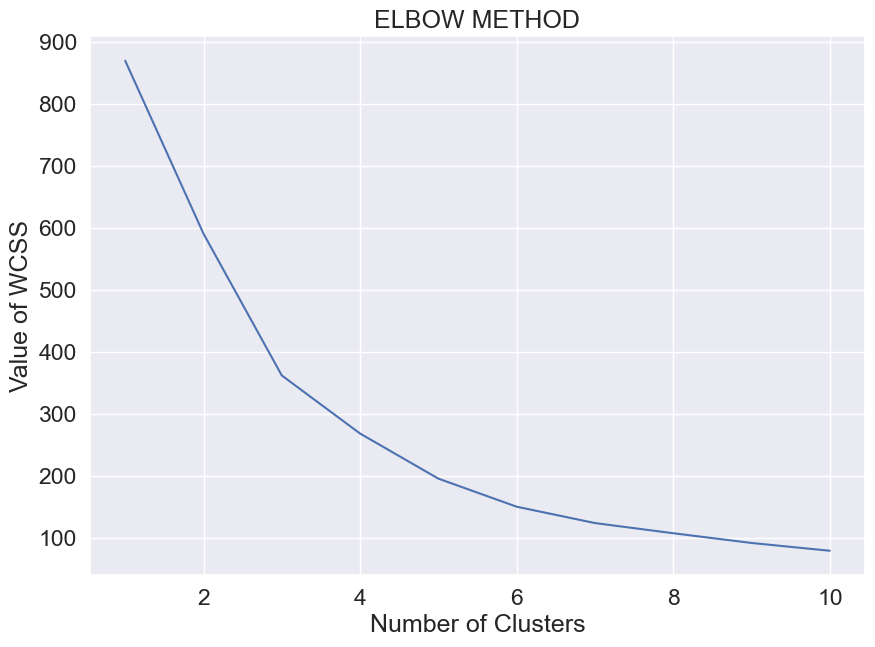

In [35]:
# Plot elbow method
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("ELBOW METHOD")
plt.xlabel("Number of Clusters")
plt.ylabel("Value of WCSS")
plt.show()

**The best num of clusters is 3**

In [36]:
# fit model
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, random_state=101)
y_pred = kmeans.fit_predict(x)

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



<function matplotlib.pyplot.show(close=None, block=None)>

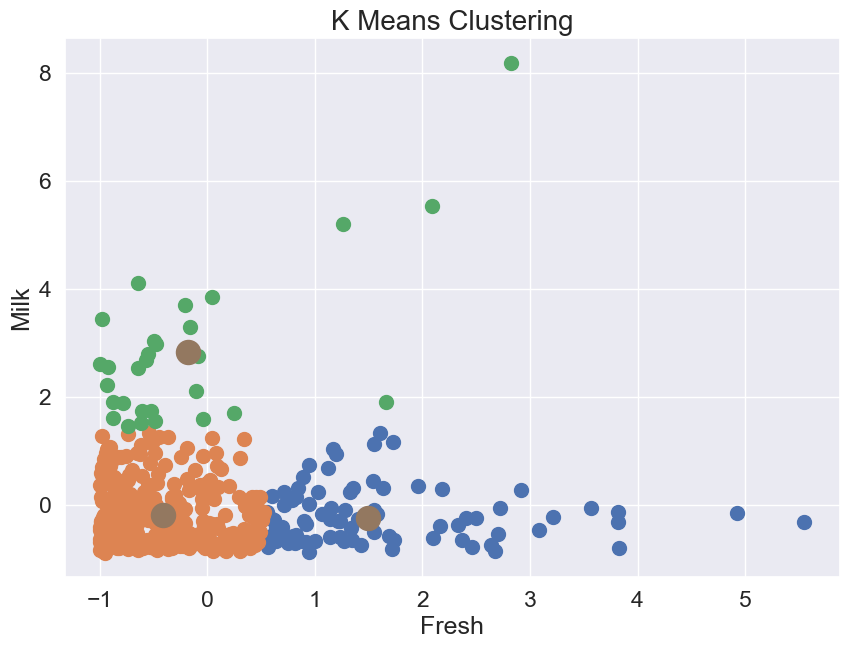

In [37]:
# Plot model
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=100)
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=100)
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=100)
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s=100)
plt.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300)

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.show

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [38]:
# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

# create an object
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 3)

In [39]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))
        
        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')
        
    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

C:\Users\got1p\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



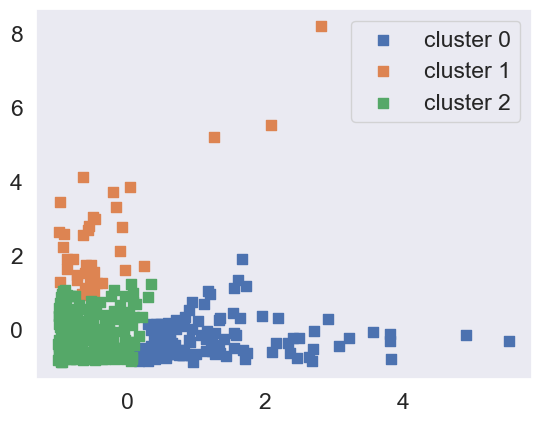

In [40]:
y_hc = ac.fit_predict(x)
plot_clusters(x,y_hc)

In [41]:
# define plot_dendrogram function
def plot_dendrogram(x,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(x, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

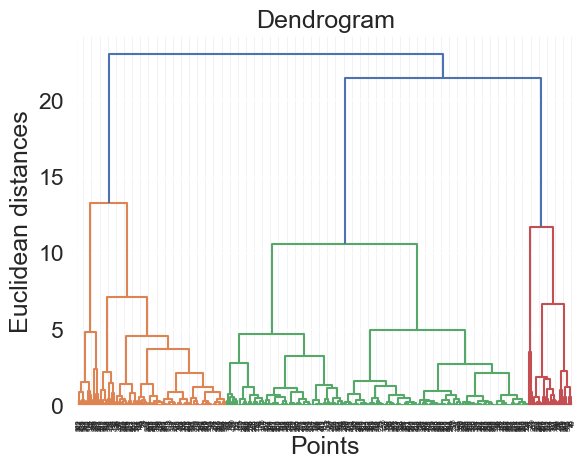

In [42]:
plot_dendrogram(x)

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [43]:
# Feature Selection with PCA

pca = PCA(n_components=None)

dfx_pca = pca.fit(df_train_scaled)

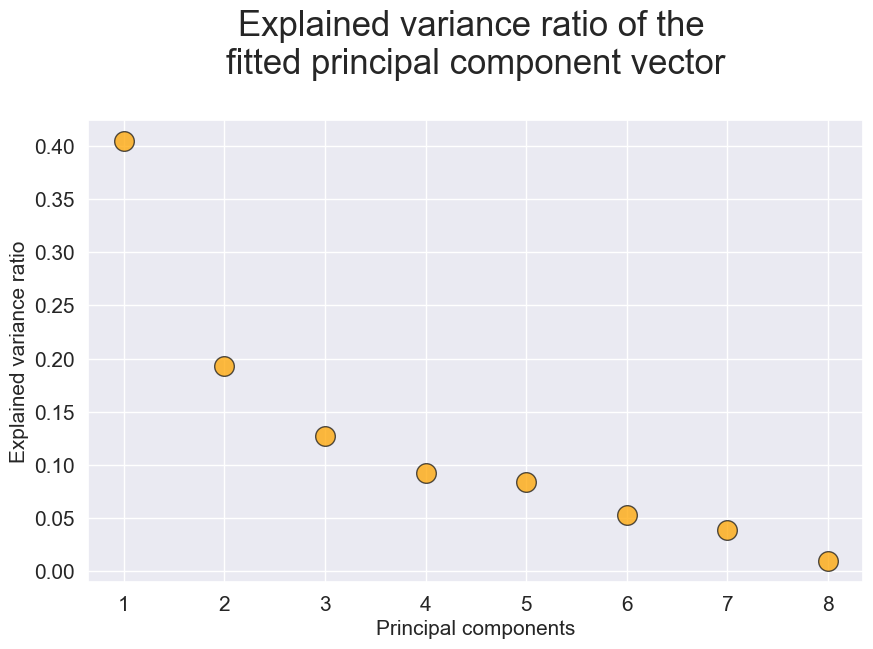

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**From the above graph, we can see that the first 3 features contain about 70% of the variance.**

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- The dataset was very clean, it contained no null, missing, or incorrect data.
- Several features had a high positive correlation with eachother. There were also outliers in most of the features which I briefly removed.
- For the clustering process, I used 'Fresh' and 'Milk' columns. From the elbow rule analysis, 3 clusters is the ideal amount. Both Kmeans and Hierarchichal clustering provided similar results and were able to cluster the data into 3 clusters. 
- From the PCA Analysis, I found out that the first three components contain about 70% of the variance.